## Import Libraries

In [67]:
#Data Processing Libraries
import numpy as np
import pandas as pd

#Data Vizuaization Libraries
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline 

import seaborn as sns
sns.set(style="darkgrid")

#Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

### Get Data
 - Source of data - https://www.kaggle.com/ronitf/heart-disease-uci
 - Space - 3 KB
 - Legal Obligations - Free Dataset

In [28]:
# Read Dataset
heart_data  = pd.read_csv('C:\\Users\\jagan\\OneDrive\\Documents\\0. Master DS ML Repository\\Projects\\Heart Disease UCI\\heart.csv')

In [29]:
# Keeping a backup of datset
heart_data_bkup = heart_data.copy()

### Extracting basic infomation from the dataset

In [30]:
#Find out total rows and columns or shapes of the dataset
print("Rows =  {}, columns = {}".format(heart_data.shape[0], heart_data.shape[1]))

Rows =  303, columns = 14


In [31]:
# Getting the attribute names
print(heart_data.columns.values)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


### Attribute Definition
- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: The person's maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

In [32]:
# Renaming the columns with valid names
heart_data.rename(columns={'cp':'chest_pain',
                           'trestbps':'rest_blood_pressure',
                           'chol':'cholestrol',
                           'fbs':'fast_blood_sugar',
                           'restecg':'rest_ecg',
                           'thalach' : 'max_heart_rate',
                           'exang' : 'exer_ind_angina',
                           'oldpeak' : 'ecg_dep_rest',
                           'slope' : 'ecg_peak_exrc',
                           'ca' : 'num_blood_vessel',
                           'thal' : 'thalassemia',
                           'target': 'heart_disease'
                          }, 
                 inplace=True)

In [33]:
## Getting Attribute Information
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                    303 non-null int64
sex                    303 non-null int64
chest_pain             303 non-null int64
rest_blood_pressure    303 non-null int64
cholestrol             303 non-null int64
fast_blood_sugar       303 non-null int64
rest_ecg               303 non-null int64
max_heart_rate         303 non-null int64
exer_ind_angina        303 non-null int64
ecg_dep_rest           303 non-null float64
ecg_peak_exrc          303 non-null int64
num_blood_vessel       303 non-null int64
thalassemia            303 non-null int64
heart_disease          303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


### Taking first look into data

In [34]:
heart_data.head(10)

,age,sex,chest_pain,rest_blood_pressure,cholestrol,fast_blood_sugar,rest_ecg,max_heart_rate,exer_ind_angina,ecg_dep_rest,ecg_peak_exrc,num_blood_vessel,thalassemia,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#### Which features are numerical?
 - All

#### Which features are Continous 
 - age
 - rest_blood_pressure
 - cholestrol
 - max_heart_rate
 - ecg_dep_rest

#### Which features are Discrete?
 - sex
 - chest_pain
 - fast_blood_sugar
 - rest_ecg
 - exer_ind_angina
 - ecg_peak_exrc
 - num_blood_vessel
 - thalassemia
 - heart_disease

#### Which features are Nominal or Ordinal ?
 - Ordinal data (variables with a meaningful order) - No.

#### Nominal data (categories that have no meaningful order) 
 - All Attributes

### Understanding the summary statistics , central tendency and dispersion of dataset

In [44]:
heart_data.describe()

,age,sex,chest_pain,rest_blood_pressure,cholestrol,fast_blood_sugar,rest_ecg,max_heart_rate,exer_ind_angina,ecg_dep_rest,ecg_peak_exrc,num_blood_vessel,thalassemia,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Summary - First Glance :
 - No missing data. Value present in all 303 rows
 - sex : Min - 0 , Max - 1 ; Expecting 2 discrete values
 - chest_pain : Min-0 , Max -3 ; Expecting 3 discrete values
 - blood_pressure : Varies between 94 to 200. Majority (25% to 75%) lies between 120 to 140. 
 - cholestrol : Low 126 and high 564, mean of 246 with high std dev of 51.
 - blood_sugar : Min - 0 , Max - 1 ; Expecting 2 discrete values
 - rest-ecg : Min-0 , Max-2 ; Expecting 3 discrete values
 - max_heart_rate : Min-71 to Max 202. Majority between 133 to 166
 - exer_ind_angina ; Min - 0 , Max - 1 ; Expecting 2 discrete values
 - ecg_dep_rest : 0 to 6.2
 - ecg_peak_exrc : Min-0 , Max-2 ; Expecting 3 discrete values
 - num_blood_vessel : Min-0 , Max-4 ; Expecting 5 discrete values
 - thalassemia : Min-0 , Max-3 ; Expecting 4 discrete values
 - heart_disease : 0- No & 1 is Yes ;  Expecting 2 discrete values

### Univariate Analysis -  Continous Attributes

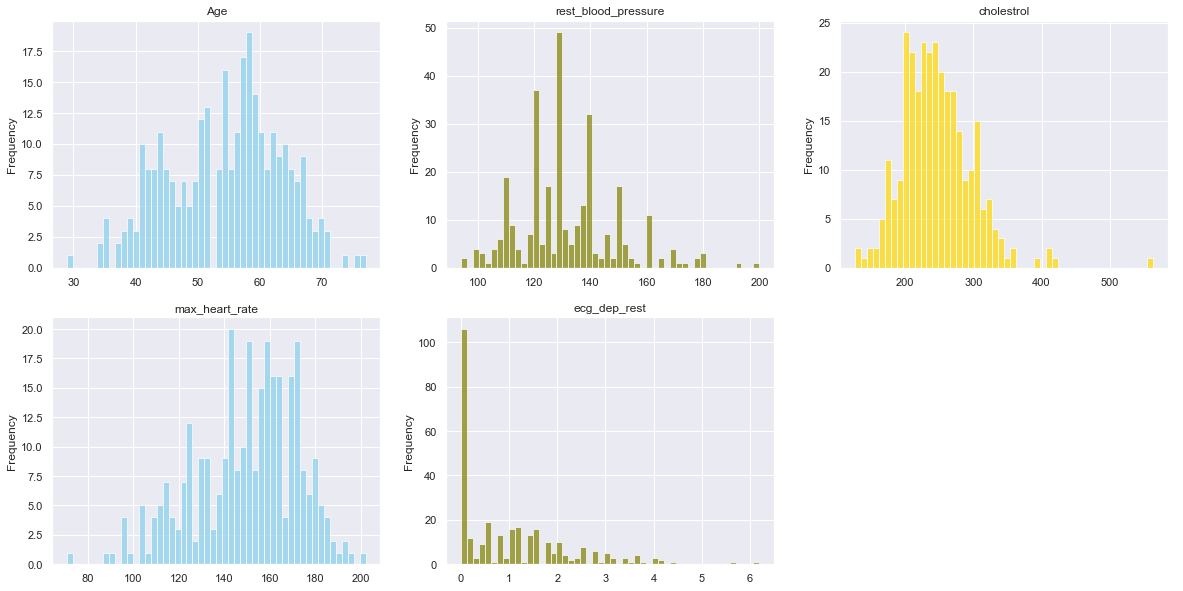

In [61]:
#Charting the histogram
f, axes = plt.subplots(2, 3, figsize=(20,10))

heart_data["age"].plot.hist(color='skyblue', alpha=0.7, bins=50, title='Age',ax=axes[0, 0])
heart_data["rest_blood_pressure"].plot.hist(color='olive', alpha=0.7, bins=50, title='rest_blood_pressure',ax=axes[0, 1])
heart_data["cholestrol"].plot.hist(color='gold', alpha=0.7, bins=50, title='cholestrol',ax=axes[0, 2])
heart_data["max_heart_rate"].plot.hist(color='skyblue', alpha=0.7, bins=50, title='max_heart_rate',ax=axes[1, 0])
heart_data["ecg_dep_rest"].plot.hist(color='olive', alpha=0.7, bins=50, title='ecg_dep_rest',ax=axes[1, 1])

axes[1,2].set_axis_off()

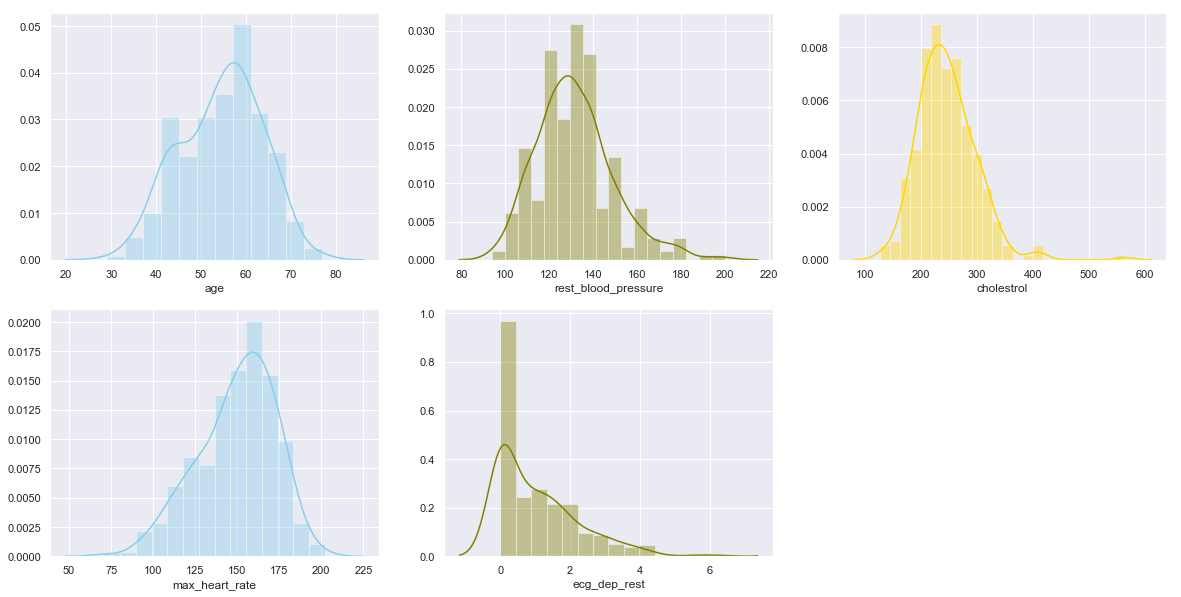

In [62]:
#Charting the density plot
f, axes = plt.subplots(2, 3, figsize=(20,10))
sns.distplot( heart_data["age"] , kde=True, rug=False, color="skyblue", ax=axes[0, 0])
sns.distplot( heart_data["rest_blood_pressure"] , kde=True, rug=False, color="olive", ax=axes[0, 1])
sns.distplot( heart_data["cholestrol"] , kde=True, rug=False, color="gold", ax=axes[0, 2])
sns.distplot( heart_data["max_heart_rate"] , kde=True, rug=False, color="skyblue", ax=axes[1, 0])
sns.distplot( heart_data["ecg_dep_rest"] , kde=True, rug=False, color="olive", ax=axes[1, 1])

axes[1,2].set_axis_off()

### Summary:
 - age : Data is centered across 55 with majority fallig in age group of 50-70
 - rest_blood_pressure : Right Skewed, this is centered across 130.Less than 120 being normal, we have considerable amount of samples above 120.Its measure in mm Hg
 Inference : (https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)
     - less than 120 : Normal
     - 120-129 : Elevated
     - 130-139 : High (Hypertension Stage-1)
     - 140-180 : High (Hypertension Stage-2)
     - 180+    : HYPERTENSIVE CRISIS
 - cholestrol : Right Skewed, this is centered across 250 .Cholesterol is usually measured in milligrams (mg) of cholesterol per deciliter (dL) of blood. 
 Inference : (https://medlineplus.gov/lab-tests/cholesterol-levels/)
     - Less than 200mg/dL : Desirable
     - 200-239 mg/dL :Borderline high
     - 240mg/dL and above : High
 - max_heart_rate : Data is left skewed centered across 160.It varies all the way from 55 to 225. For resting between 60 and 100 beats per minute (bpm) is normal. Inference (https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates)
 - ecg_dep_rest : Data is right skewed with maximum samples across 0 to 0.5 range.
    - Reference : https://www.mayoclinic.org/diseases-conditions/myocardial-ischemia/symptoms-causes/syc-20375417
    - Reference : https://en.wikipedia.org/wiki/ST_depression
    - Myocardial ischemia, also called cardiac ischemia, can damage your heart muscle, reducing its ability to pump efficiently.Myocardial ischemia occurs when blood flow to your heart is reduced, preventing it from receiving enough oxygen. The reduced blood flow is usually the result of a partial or complete blockage of your heart's arteries (coronary arteries).
    - In a cardiac stress test, an ST depression of at least 1 mm after adenosine administration indicates a reversible ischaemia

### Univariate Analysis -  Discrete Attributes

In [94]:
# Getting the list of all columns
columns_list = list(heart_data.columns)

#Removing the Continuous Variables
columns_list.remove('age')
columns_list.remove('rest_blood_pressure')
columns_list.remove('cholestrol')
columns_list.remove('max_heart_rate')
columns_list.remove('ecg_dep_rest')

#Creating xlabel list
x_label_list = ['sex (0:Female, 1:Male)', 
                'chest_pain_level', 
                'fast_blood_sugar (0: <= 120mg/ml, 1: > 120mg/ml)',
                'rest_ecg (0:Normal,1:ST-T Abnorm., 2:Left vent. hypertropy)', 
                'exer_ind_angina (0:No, 1:Yes)', 
                'ecg_peak_exrc(1:upsloping, 2:flat, 3:downsloping)', 
                'num_blood_vessel', 
                'thalassemia(1:Norm, 2:fixed defect, 3:rev. defect)', 
                'heart_disease(0:No, 1:Yes)']

In [95]:
#Creating Column and xlebel into 3X3 matrix to display 9 bar charts in 3X3 form:
columns_list_nparray = np.array(columns_list).reshape(3,3)
x_label_list_nparray = np.array(x_label_list).reshape(3,3)

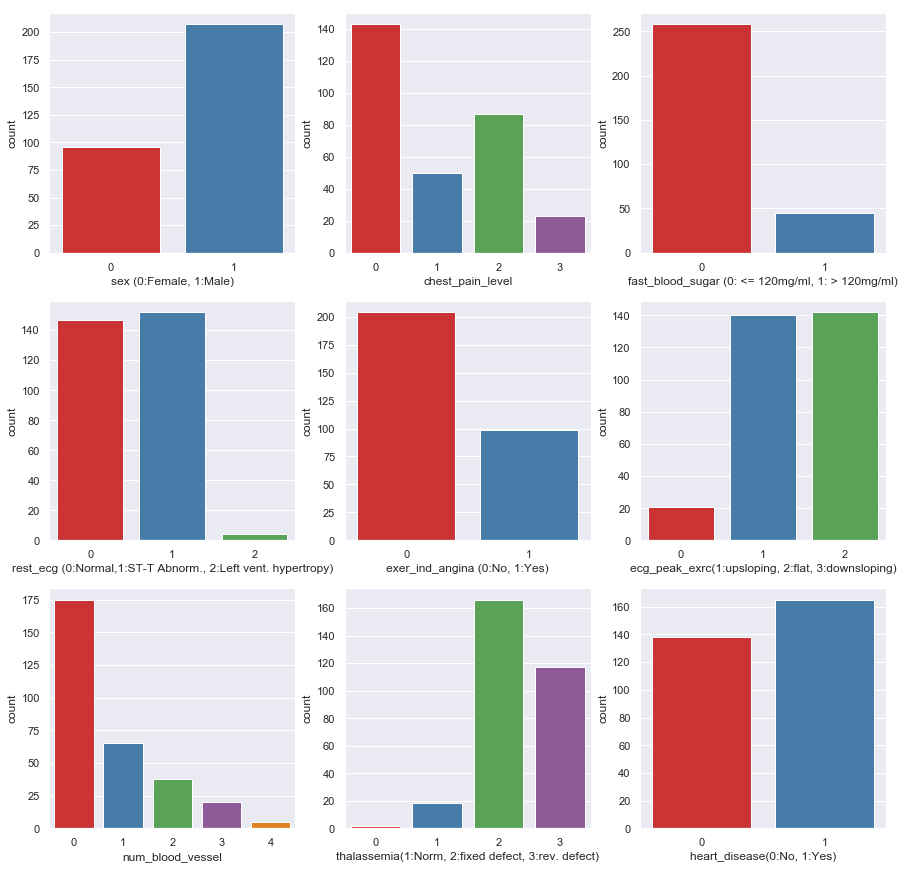

In [97]:
# Plotting the bar chart
rows = 3 ; columns = 3
f, axes = plt.subplots(rows, columns, figsize=(15, 15))
#print('Univariate Analysis of discrete attributes')
for row in range(rows):
    for column in range(columns):
        g=sns.countplot(heart_data[columns_list_nparray[row][column]], palette = "Set1", ax = axes[row, column])
        # Set the xlabel of the graph from here
        g.set_xlabel(x_label_list_nparray[row][column])

### Summary:

### Bivariate Analysis

### Computing pairwise correlation of columns

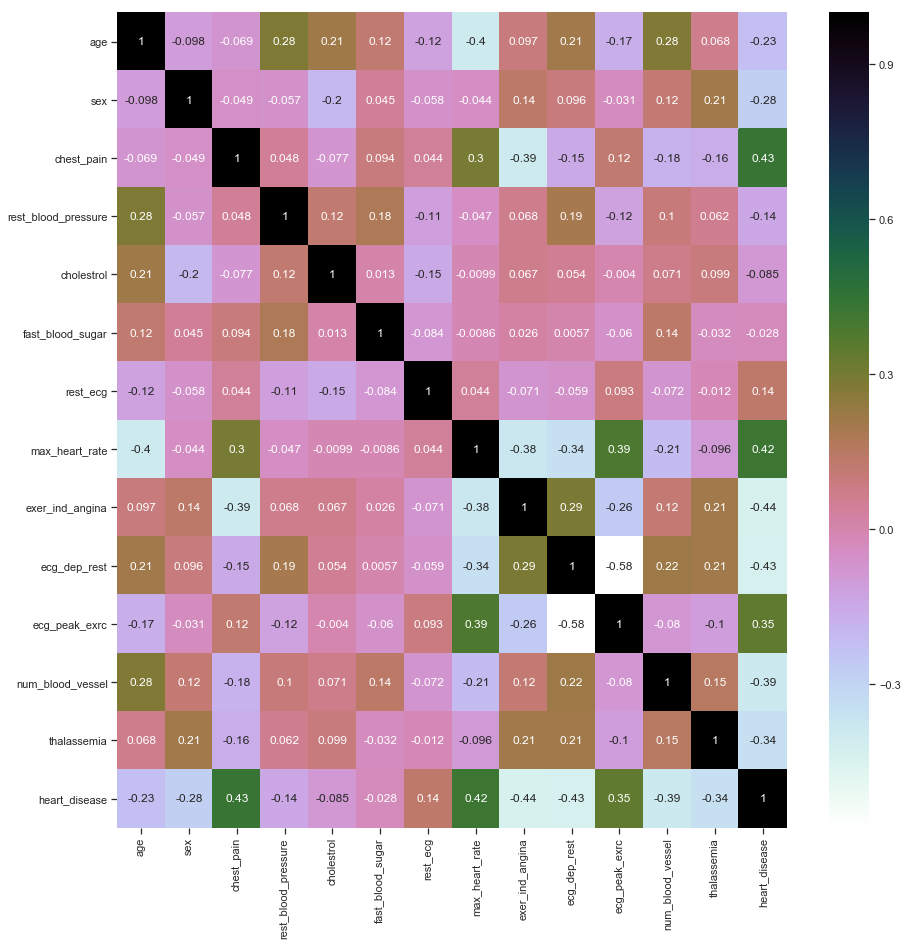

In [99]:
#iris_dataset.corr(method='pearson')
plt.figure(figsize=(15,15)) 
sns.heatmap(heart_data.corr(),annot=True,cmap='cubehelix_r')